In [3]:
import train
# from train import eval
from eval import evaluation
import gymnasium as gym
from gymnasium.envs.registration import register
from stable_baselines3 import A2C, PPO, DQN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

model_path = "models/ppo-reward-scale.zip"  # Change path name to load different models
env = gym.make('2048-v0')
model = PPO.load(model_path)
eval_num = 200
scores, highest, rewards = evaluation(env, model, eval_num)

# c = Counter(highest)
# for item in (sorted(c.items(),key = lambda i: i[0])):
#     print(f"{item[0]}: {item[1]}")


Rendering last rollout


In [10]:
np.median(np.array(rewards))

np.float64(0.02)

(array([5.164e+03, 0.000e+00, 0.000e+00, 0.000e+00, 3.326e+03, 0.000e+00,
        2.279e+03, 8.620e+02, 9.730e+02, 5.510e+02, 3.300e+02, 7.270e+02,
        1.150e+02, 2.910e+02, 5.300e+01, 1.120e+02, 1.400e+01, 2.900e+01,
        1.000e+00, 2.000e+00]),
 array([0.        , 0.00450561, 0.00901123, 0.01351684, 0.01802245,
        0.02252807, 0.02703368, 0.0315393 , 0.03604491, 0.04055052,
        0.04505614, 0.04956175, 0.05406736, 0.05857298, 0.06307859,
        0.0675842 , 0.07208982, 0.07659543, 0.08110105, 0.08560666,
        0.09011227]),
 <BarContainer object of 20 artists>)

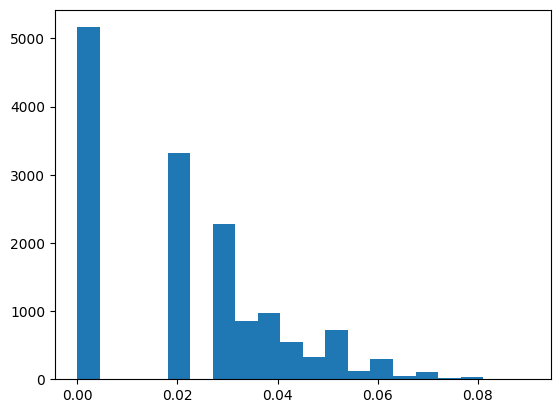

In [5]:
plt.hist(rewards, bins=20)

(array([9748.,    0., 6131., 4249., 3306., 1601., 1485.,  618.,  235.,
          49.]),
 array([0.        , 0.00081699, 0.00163399, 0.00245098, 0.00326797,
        0.00408496, 0.00490196, 0.00571895, 0.00653594, 0.00735293,
        0.00816993]),
 <BarContainer object of 10 artists>)

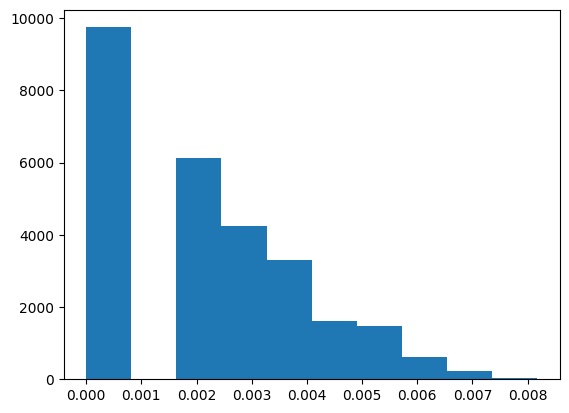

In [4]:
plt.hist(rewards)

(array([6.131e+03, 4.249e+03, 1.555e+03, 0.000e+00, 1.751e+03, 9.660e+02,
        0.000e+00, 4.840e+02, 1.510e+02, 5.710e+02, 0.000e+00, 4.100e+02,
        3.070e+02, 0.000e+00, 1.060e+02, 6.200e+01, 2.900e+01, 0.000e+00,
        1.600e+01, 5.000e+00, 0.000e+00, 2.050e+02, 1.300e+02, 1.230e+02,
        0.000e+00, 5.400e+01, 5.300e+01, 0.000e+00, 2.000e+01, 8.000e+00,
        4.000e+00, 0.000e+00, 1.400e+01, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.900e+01, 0.000e+00, 4.700e+01, 4.700e+01, 1.300e+01,
        0.000e+00, 1.800e+01, 1.000e+01, 0.000e+00, 4.000e+00, 1.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

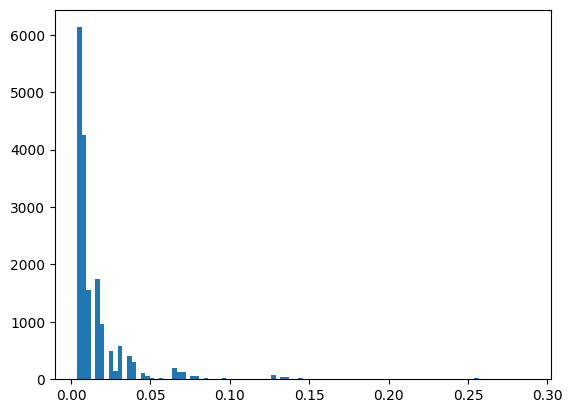

In [14]:
# reward = 0 if reward == 0 else np.log2(reward) / 10
rewards = [_ for _ in rewards if _ != 0]
plt.hist(rewards, bins=100)